# AFREEN FATIMA - 1713103

## CMM536 - ADVANCE DATA SCIENCE 

####  OVERVIEW: 

Coursework is about processing medical image analysis by gathering xray images of different body parts. We will be designing an experimental validation to test different algorithms to help classify different body sections i.e., we are developing a framework by collecting different body parts xray images, training algorithms, testing those algorithms and comparing results.

X-ray is the most common clinical procedure. Every year more than 600 xray examinations are conducted to examine the different body parts. Previously many deep learning based systems has been deployed to support hospital staff and labs in interpreting xray scans. These systems are for analyzing specific anatomies. example, lung, abdominal, spine, etc. this requires identification of human body contained in the input image. Vast number of hospital databases of X-ray images requires an AI approach to classify different body parts from X-ray images. The link to this abstract reference can be found here [Reference](https://www.medrxiv.org/content/10.1101/2021.08.13.21261945v1.full)

#### PART 1 - DATA COLLECTION

For the coursework dataset has been collected from resources provided on Trello board. Dataset consist of X-ray images in 4 repositories/classes. The dataset is imablanced and has 4 body parts X-rays, so my dataset has 4 class 

1. **Chest**: Nearly 2364 .jpg image files has been taken from [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). This is a pneumonia chest xray classification dataset and contains nearly 1000 negative and 1364 positive cases of pneumonia.

2. **Elbow**: Nearly 501 .png image files has been taken from [here](https://stanfordmlgroup.github.io/competitions/mura/). MURA (musculoskeletal radiographs) is a dataset of bone X-rays. From which I have extracted 256 normal and 250 abnormal cases of musculoskeletal condition. (Elbow - Mura, n.d.)

3. **Knee**: Nearly 518 .png image files has been taken from [here](https://data.mendeley.com/datasets/t9ndx37v5h/1). I have extracted 100 of each Normal, doubtful, moderate, mild and severe x-ray images has been extracted. (Knee - Mendeley data , n.d.)

4. **Shoulder**: Nearly 1299 .png image files has been taken from [here](https://stanfordmlgroup.github.io/competitions/mura/). From which I have extracted 600 normal and 699 abnormal cases. (Shoulder - Stanford ML Group, n.d.) 


#### PLOTTING SAMPLE IMAGE FROM EACH CLASS OF THE DATASET  

I have gathered the understanding of plotting several images in one single plot from [here](https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/).

In [1]:
# Ignore warnings
import warnings; warnings.simplefilter('ignore')
## Importing the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import random
import cv2
import csv
from skimage import feature
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# I use this to print the plots in the notebook
%matplotlib inline 

Text(0.5, 1.0, 'Shoulder')

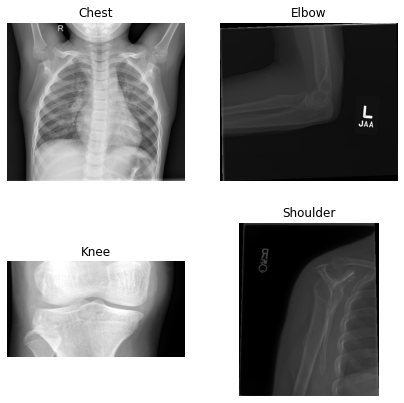

In [2]:
# Importing libraries
import cv2
from matplotlib import pyplot as plt

# Creating plot figure
fig = plt.figure(figsize=(7, 7))

# Setting rows and columns variables
rows = 2
columns = 2

# Reading first image from each class folder of a dataset as a sample
Chest_Sample= cv2.imread(r'C:\Users\Afreen\OneDrive\Documents\RGU\Semester 2\Advance data science\Coursework\Dataset\Chest\0 (1).jpeg')
Elbow_Sample= cv2.imread(r'C:\Users\Afreen\OneDrive\Documents\RGU\Semester 2\Advance data science\Coursework\Dataset\Elbow\1.png')
Knee_Sample = cv2.imread(r'C:\Users\Afreen\OneDrive\Documents\RGU\Semester 2\Advance data science\Coursework\Dataset\Knee\DoubtfulG1 (1).png')
Shoulder_Sample = cv2.imread(r'C:\Users\Afreen\OneDrive\Documents\RGU\Semester 2\Advance data science\Coursework\Dataset\Shoulder\1 (1).png')

# Subplotting first position image
fig.add_subplot(rows, columns, 1)

# Sample image from class 'Chest'
plt.imshow(Chest_Sample)
plt.axis('off')
plt.title("Chest")

# Subplotting second position image
fig.add_subplot(rows, columns, 2)

# Sample image from class 'Elbow'
plt.imshow(Elbow_Sample)
plt.axis('off')
plt.title("Elbow")

# Subplotting third position image
fig.add_subplot(rows, columns, 3)

# Sample image from class 'Knee'
plt.imshow(Knee_Sample)
plt.axis('off')
plt.title("Knee")

# Subplotting fourth position image
fig.add_subplot(rows, columns, 4)

# Sample image from class 'Shoulder'
plt.imshow(Shoulder_Sample)
plt.axis('off')
plt.title("Shoulder")

#### IMPORTING PACKAGES REQUIRED [(Carlos Moreno-Garcia - Lab notebooks 3&4, 2021)](https://campusmoodle.rgu.ac.uk/)

In [3]:
!pip install tensorflow
!pip install --upgrade tensorflow

#### IMPORTING Tensorflow ALONG WITH numpy and matplotlib.pyplot  [(Carlos Moreno-Garcia - Lab notebooks 3&4, 2021)](https://campusmoodle.rgu.ac.uk/)

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


#### LOADING DATASET AND CONVERTING INTO NUMPY ARRAY: [(Carlos Moreno-Garcia - Data loading tutorial, 2021)](https://campusmoodle.rgu.ac.uk/)

When we do datascience with image we don't work with image/picture but the pixels that are numbers. ie., if we have an image it a box of colors. Machine learning with images can be done by pixels. These pixels are passed to framework or machine learning algorithm so it learn how to classify this. The output of the below code shows how all the images in the repository are turned into numpy array. Each row represent an image. 


Loading images...
Invalid file desktop.ini skipped.

Calculating class distribution...
      Class  Number of Samples
0     Chest               3713
1     Elbow                501
2      Knee                518
3  Shoulder               1299
Total images: 6031

Showing class distribution bar chart...


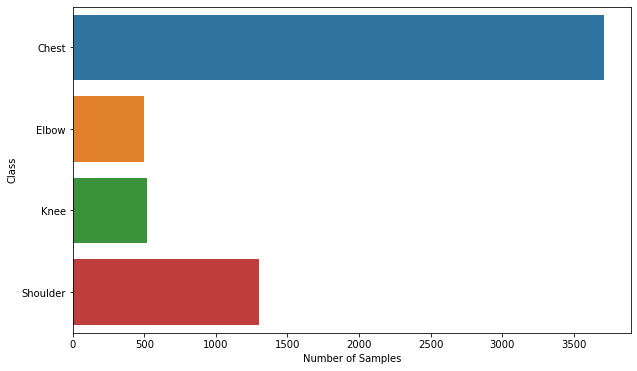

Size of target:  6031
Size of original repository:  (6031, 784)
Example of the original repository: 
[[ 17  69  97 ...  18  31  32]
 [ 56  82  84 ...  31   0   0]
 [  0   0   0 ... 119 121   0]
 ...
 [  0  47  30 ...  83  80  73]
 [ 65  59  55 ...  56  53  48]
 [ 51  66  63 ... 105 109 109]]
Size of binarised data structure:  (6031, 784)
Example of the binarised repository: 
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]]
Size of HOG features data structure:  (6031, 72)
Example of the HOG repository: 
[[0.39587645 0.17643086 0.06639382 ... 0.31345049 0.31345049 0.31345049]
 [0.32313911 0.23093921 0.20551501 ... 0.35167418 0.35167418 0.3239423 ]
 [0.3315954  0.3315954  0.08824621 ... 0.32307312 0.36699639 0.36699639]
 ...
 [0.50595849 0.04551528 0.         ... 0.31411079 0.24950431 0.2959211 ]
 [0.34184899 0.06741743 0.06114215 ... 0.36924266 0.

In [5]:
################################ 1. DEFINE CLASS TO EXTRACT HOG FEATURES ################################    
class HOG:
    def __init__(self, orientations = 9, pixelsPerCell = (8, 8),
        cellsPerBlock = (3, 3), transform = False):
        # store the number of orientations, pixels per cell,
        # cells per block, and whether or not power law
        # compression should be applied
        self.orienations = orientations
        self.pixelsPerCell = pixelsPerCell
        self.cellsPerBlock = cellsPerBlock
        self.transform = transform

    def describe(self, image):
        # compute HOG for the image
        hist = feature.hog(image, orientations = self.orienations,
            pixels_per_cell = self.pixelsPerCell,
            cells_per_block = self.cellsPerBlock,
            transform_sqrt = self.transform)
        ## return the HOG features
        return hist
    
hog = HOG(orientations = 18, pixelsPerCell = (10, 10), cellsPerBlock = (1, 1), transform = True)
########  2. LOAD IMAGES (FOR ORIGINAL REPO), BINARISE (FOR PREPROCESSED REPO) & EXTRACT HOG FEATURES (FOR FEATURE REPO) ######## 

bin_thresh = 100 # Threshold for binarisation
resize_factor = 28 # applies for both height and width

path = 'Dataset'
datarepo = [] # List to append the images as 2D numpy arrays
originalrepo = [] # Create a repo for flattened pixels
binarisedrepo = []  # Create a list to append the binarised pixels
hogrepo = [] # Create a list to append the HOG features
target = [] # List to append the target/class/label
print('\nLoading images...')
for root, dirs, files in os.walk(path):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0)
                img = cv2.resize(img, (resize_factor, resize_factor)) 
                datarepo.append(img)
                originalrepo.append(img.flatten())
                _, img_bin = cv2.threshold(img, bin_thresh, 255, 0) 
                # Append the flattened image to the pixel repo
                binarisedrepo.append(img_bin.flatten())
                # Extract HOG and append to HOG repo
                hogfeatures = hog.describe(img)
                hogrepo.append(hogfeatures)
                # Append the folder where the image is to the target list
                target.append(root.replace(path,'').replace('\\','').replace('/',''))
            except Exception as e:
                print("Invalid file "+file+" skipped.")
            
# Convert the repo lists into numpy arrays
originalrepo = np.array(originalrepo)
binarisedrepo = np.array(binarisedrepo)
hogrepo = np.array(hogrepo)

########################## 3. CALCULATE THE DISTRIBUTION AND SHOW REPOS ##########################

print('\nCalculating class distribution...')
histo = [['Class','Number of Samples']]
for i, label1 in enumerate(sorted(list(set(target)))):
    cont = 0
    for j, label2 in enumerate(target):
        if label1 == label2:
            cont+=1
    histo.append([label1,cont])
histo.append(['Total Samples', len(target)])
## Save the histogram as a .csv file   
with open('classdistribution.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, hist in enumerate(histo):
        filewriter.writerow(hist)
## Load as a panda
histo_panda = pd.DataFrame.from_records(histo[1:-1], columns=histo[0])
print(histo_panda)
print('Total images: '+str(len(target)))
## Create a histogram using seaborn
sns_plot = sns.barplot(y="Class", x="Number of Samples", data=histo_panda)
## Save the image
sns_plot.figure.set_size_inches(10,6)
sns_plot.figure.savefig('barchart.jpg', orientation = 'landscape', dpi = 600, transparent=True)
print('\nShowing class distribution bar chart...')
plt.show()
print('Size of target: ', len(target))
print('Size of original repository: ', originalrepo.shape)
print('Example of the original repository: ')
print(originalrepo)
print('Size of binarised data structure: ', binarisedrepo.shape)
print('Example of the binarised repository: ')
print(binarisedrepo)
print('Size of HOG features data structure: ', hogrepo.shape)
print('Example of the HOG repository: ')
print(hogrepo)

################################ 4. SAVE THE DATASETS AS CSV FILES ################################

print('\nSaving datasets as .csv files...')   

with open('original.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, pix in enumerate(originalrepo):
        row = np.concatenate((pix,[target[i]]))
        filewriter.writerow(row)

with open('hog.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, h in enumerate(hogrepo):
        row = np.concatenate((h,[target[i]]))
        filewriter.writerow(row)

with open('binarised.csv', 'w', newline='', encoding='utf-8') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',')
    for i, l in enumerate(binarisedrepo):
        row = np.concatenate((l,[target[i]]))
        filewriter.writerow(row)

print('\nData saved into .csv files!')  

In [8]:
print(originalrepo.shape)

(6031, 784)


# PART 2 - Validation 

In [6]:
target_names = np.genfromtxt(target,
                   # usecols=range(9,10), # This brings the last column of the dataset, which has the class
                     dtype = None,
                     encoding = None, # This helps us get the strings in a numpy array
                    # skip_header=14,
                     delimiter=',')

print(target_names,target_names.shape)

['Chest' 'Chest' 'Chest' ... 'Shoulder' 'Shoulder' 'Shoulder'] (6031,)


In [7]:
target = []
target = [0 if i == 'Chest'
          else 1 if i == 'Elbow'
          else 2 if i == 'Knee'
          else 3 for i in target_names]
# target = [1 if i == 'Knee' else 2 for i in target_names]
target=np.array(target)
print(target,target.shape)

[0 0 0 ... 3 3 3] (6031,)


## Stratified Split 

[(Carlos Moreno-Garcia - CMM536_CWP1partofP2_ModelSolution, 2022)](https://campusmoodle.rgu.ac.uk/)
Applying a stratified split to reserve 30% of dataset for testing and 70% of training. This will be applied for the three versions obtained (original, binarised and hog)

In [8]:
originaldata_train, originaldata_test, targetoriginaldata_train, targetoriginaldata_test = train_test_split(originalrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)

bindata_train, bindata_test, targetbindata_train, targetbindata_test = train_test_split(binarisedrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)

hogdata_train, hogdata_test, targethogdata_train, targethogdata_test = train_test_split(hogrepo, 
                                                                          target, test_size=0.3, 
                                                                          random_state=42, stratify=target)

In [12]:
#print(originaldata_train.shape, originaldata_test.shape)

## a. Training with a training data and testing with a test data and classification using a neural network-based machine learning architecture.

Notice that we have 4221 samples for training and 1810 for testing.

Now we will preprocess the data to be used by the classifier. To be able to use Keras, we need to do the following:

Reshape the data into four dimensions i.e. the training set will be of shape (4221,28,28,1) and the test set of (1810,28,28,1). This is useful since the network needs an input shape of (1,28,28) for each of the samples.
Convert the format of the input into float32 (apparently the CNN works better with it).
Normalise i.e. divide all values by 255.

In [14]:
# 5. Preprocess input data
# Reshape into four dimensions.
originaldata_train_reshape = originaldata_train.reshape(originaldata_train.shape[0], 28, 28, 1)
originaldata_test_reshape = originaldata_test.reshape(originaldata_test.shape[0], 28, 28, 1)
# Convert to float 32
originaldata_train_reshape = originaldata_train_reshape.astype('float32')
originaldata_test_reshape = originaldata_test_reshape.astype('float32')
# normalise
originaldata_train_reshape /= 255 
originaldata_test_reshape /= 255

CNNs also like their target to be categorical, i.e. instead of the target being values from 0 to 3, each target value will be a vector indicating which is the class according to the position. Run the following cell to see what I mean...

In [15]:
#  Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

[0. 0. 0. 1.]


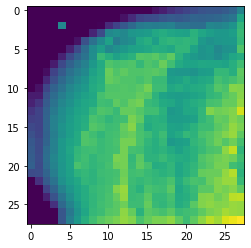

In [16]:
#  Preprocess class labels
targetoriginaldata_train_categorical = np_utils.to_categorical(targetoriginaldata_train, 4)
targetoriginaldata_test_categorical = np_utils.to_categorical(targetoriginaldata_test, 4)
# Show a sample target entry. You will see that this sample corresponds to a 5 as
# there is a five in the 0th position (remember that python starts in 0)
print(targetoriginaldata_train_categorical[0])
plt.imshow(originaldata_train_reshape[0])

In [19]:
# Define model architecture
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model1 = Sequential()
 
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))

In [20]:
#  Print a summary of the model
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                      

In [21]:
#Compile model
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
# Fit model on training data
n=4221 # In google colab, don't worry if you use all the data!
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model1.fit(originaldata_train_reshape[:n], targetoriginaldata_train_categorical[:n], 
          batch_size=32, epochs=5, verbose=1) # verbose = 1 lets you see the training log for each iteration, higher values just gives you a summary

Epoch 1/5
132/132 [==============================] - 5s 35ms/step - loss: 0.3563 - accuracy: 0.8616
Epoch 2/5
132/132 [==============================] - 4s 33ms/step - loss: 0.1158 - accuracy: 0.9616
Epoch 3/5
132/132 [==============================] - 4s 34ms/step - loss: 0.1107 - accuracy: 0.9638
Epoch 4/5
132/132 [==============================] - 4s 33ms/step - loss: 0.0823 - accuracy: 0.9735
Epoch 5/5
132/132 [==============================] - 4s 33ms/step - loss: 0.0744 - accuracy: 0.9737


Evaluating on test data with loss and accuracy for unseen data for the model

In [26]:
n=1810
loss, accuracy = model1.evaluate(originaldata_test_reshape[:n], targetoriginaldata_test_categorical[:n], verbose=0)
print('Loss: ', loss,'\nAcc: ', accuracy)

Loss:  0.07047216594219208 
Acc:  0.9767955541610718


In [29]:
from tensorflow.keras.models import load_model
model1.save('CNN_CW.h5') #
predictions = model1.predict(originaldata_test_reshape)
predictions = np.argmax(predictions,axis=1)
predictions[:15]



array([0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 2, 1, 3, 3, 0], dtype=int64)

In [30]:
# 13. Check the label that has been predicted incorrectly
incorrect_labels=[]
accuracy = 0
for i,cla in enumerate(predictions):
  if cla != targetoriginaldata_test[:n][i]:
    print("Sample "+str(i)+" was classified as "+str(cla)+" when it really was "+str(targetoriginaldata_test[:n][i]))

Sample 13 was classified as 3 when it really was 1
Sample 97 was classified as 1 when it really was 3
Sample 106 was classified as 3 when it really was 1
Sample 273 was classified as 1 when it really was 3
Sample 293 was classified as 1 when it really was 3
Sample 310 was classified as 3 when it really was 1
Sample 346 was classified as 3 when it really was 1
Sample 360 was classified as 1 when it really was 3
Sample 366 was classified as 3 when it really was 1
Sample 384 was classified as 1 when it really was 2
Sample 391 was classified as 1 when it really was 3
Sample 506 was classified as 1 when it really was 3
Sample 618 was classified as 2 when it really was 3
Sample 681 was classified as 1 when it really was 3
Sample 739 was classified as 3 when it really was 1
Sample 748 was classified as 1 when it really was 3
Sample 894 was classified as 3 when it really was 1
Sample 972 was classified as 1 when it really was 3
Sample 1069 was classified as 1 when it really was 3
Sample 1094 w

Ground truth label:  0
Predicted label:  0


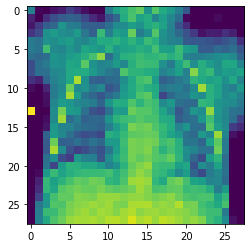

In [31]:
# Show a sample from  dataset
image_to_show = 70
from_group = 'Chest' # 'train' or 'test'
if from_group == 'Elbow':
    plt.imshow(originaldata_train_reshape[image_to_show])
    print('Ground truth label: ',targetoriginialdata_train[image_to_show])
else:
    plt.imshow(originaldata_test_reshape[image_to_show])
    print('Ground truth label: ',targetoriginaldata_test[image_to_show])
    if len(predictions)>image_to_show:
        print('Predicted label: ',predictions[image_to_show])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(targetoriginaldata_test, predictions, target_names = ['Chest (Class 0)','Elbow (Class 1)', 'Knee (Class 2)', 'Shoulder (Class 3)']))



                    precision    recall  f1-score   support

   Chest (Class 0)       1.00      1.00      1.00      1114
   Elbow (Class 1)       0.85      0.90      0.87       150
    Knee (Class 2)       0.99      0.98      0.98       156
Shoulder (Class 3)       0.96      0.94      0.95       390

          accuracy                           0.98      1810
         macro avg       0.95      0.95      0.95      1810
      weighted avg       0.98      0.98      0.98      1810



## b. Balancing the classes of the training data (e.g. using image augmentation) and classification of the test set using a neural network-based machine learning architecture.

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [11]:
originaldata_train.shape

(4221, 784)

In [28]:
model.evaluate(originaldata_test_reshape, targetoriginaldata_test)

57/57 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9867


[0.051600776612758636, 0.9867403507232666]

In [30]:
predictions = model.predict(originaldata_test_reshape)
predictions

array([[24.430002  ,  6.2949452 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [22.563307  ,  5.6243157 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [21.368769  ,  5.8863025 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 7.8189306 , 22.227215  ,  8.651176  , ...,  0.05685722,
         0.        ,  0.        ],
       [ 6.1345086 , 13.544493  , 19.354622  , ...,  0.        ,
         0.        ,  0.        ],
       [22.170826  ,  5.9792614 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [31]:
score = tf.nn.softmax(predictions[0])
#score

<tf.Tensor: shape=(256,), dtype=float32, numpy=
array([1.0000000e+00, 1.3305911e-08, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.4557540e-11, 2.4557540e-11, 2.4557540e-11, 2.4557540e-11,
       2.45575

In [67]:
# Data augmentation

data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal"),
   layers.experimental.preprocessing.RandomRotation(0.1),
   layers.experimental.preprocessing.RandomZoom(0.2)
])

In [68]:
#Displaying randomly augmented training images
plt.figure(figsize=(5,5))
for images in originaldata_train_reshape.take(1):
    for i in range (9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(augmented_images[0].numpy(). astype("float32"))
        plt.axis("off")

TypeError: 'numpy.float32' object is not iterable

<Figure size 360x360 with 0 Axes>

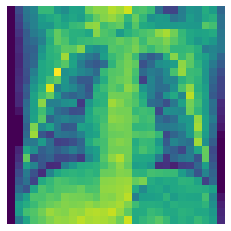

In [64]:
#Plotting first image from training set
plt.axis('off')
plt.imshow(data_augmentation(originaldata_train_reshape)[10])

In [65]:
data_augmentation2 = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
])

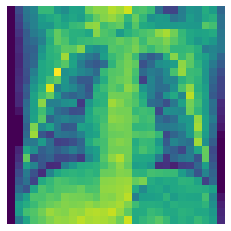

In [62]:
#Plotting first image from training set
plt.axis('off')
plt.imshow(originaldata_train_reshape[10])

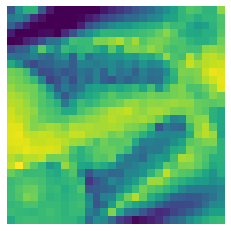

In [64]:
#Plotting first image from training set
plt.axis('off')
plt.imshow(data_augmentation2(originaldata_train_reshape)[10])

In [65]:
model = Sequential()
    data_augmentation,
    layers.Conv2D(16, 4, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 4, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 4, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 4, padding = 'same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
     layers.Dense(256, activation ='relu')

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(originaldata_train_reshape, targetoriginaldata_train, epochs=10)

Epoch 1/10
132/132 [==============================] - 3s 21ms/step - loss: 1.3654 - accuracy: 0.6323
Epoch 2/10
132/132 [==============================] - 3s 21ms/step - loss: 0.4809 - accuracy: 0.8313
Epoch 3/10
132/132 [==============================] - 3s 21ms/step - loss: 0.3262 - accuracy: 0.8853
Epoch 4/10
132/132 [==============================] - 3s 21ms/step - loss: 0.2681 - accuracy: 0.9014
Epoch 5/10
132/132 [==============================] - 3s 21ms/step - loss: 0.2371 - accuracy: 0.9166
Epoch 6/10
132/132 [==============================] - 3s 23ms/step - loss: 0.2429 - accuracy: 0.9128
Epoch 7/10
132/132 [==============================] - 3s 21ms/step - loss: 0.2168 - accuracy: 0.9180
Epoch 8/10
132/132 [==============================] - 3s 21ms/step - loss: 0.2108 - accuracy: 0.9251
Epoch 9/10
132/132 [==============================] - 3s 22ms/step - loss: 0.1936 - accuracy: 0.9315
Epoch 10/10
132/132 [==============================] - 3s 22ms/step - loss: 0.1969 - accura

In [67]:
model.evaluate(originaldata_test_reshape, targetoriginaldata_test)

57/57 [==============================] - 1s 6ms/step - loss: 0.0992 - accuracy: 0.9685


[0.0991673693060875, 0.9685083031654358]

## REFERENCES

@patildhanu4111999, 2021. How to Display Multiple Images in One Figure Correctly in Matplotlib?. [Online] 
Available at: https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
[Accessed 28 02 2022].

Carlos Moreno-Garcia - Data loading tutorial, 2021. Data Loading Tutorial .ipynb. Aberdeen: Robert Gordon University.

Carlos Moreno-Garcia - Lab notebooks 3&4, 2021. Images as Data, Feature extraction and learning. Aberdeen: Robert Gordon University.

Chest - Kaggle, 2021. Chest X-ray images for pneumonia. [Online] 
Available at: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia
[Accessed 22 02 2022].

Elbow - Mura, 2021. MURA - Bone X-Ray Deep Learning Competition. [Online] 
Available at: https://stanfordmlgroup.github.io/competitions/mura/
[Accessed 22 02 2022].

Khandelwal, R., n.d. Loading Custom Image Dataset for Deep Learning Models: Part 1. 

Knee - Mendeley data, 2021. Digital Knee X-ray Images. [Online] 
Available at: https://data.mendeley.com/datasets/t9ndx37v5h/1
[Accessed 28 02 2022].

merdvix - Xray overview, 2021. Merdvix. [Online] 
Available at: https://www.medrxiv.org/content/10.1101/2021.08.13.21261945v1.full
[Accessed 28 02 2022].

Shoulder - Stanford ML Group, 2021. MURA - Bone X-Ray Deep Learning Competition. [Online] 
Available at: https://stanfordmlgroup.github.io/competitions/mura/
[Accessed 22 02 2022].

